<div style="background-color:#3a0a0a; color:white; padding:25px; border-radius:10px; 
            text-align:center; font-family:'Segoe UI', sans-serif;">

  <h1 style="margin-bottom:8px;"> Cars 4 You 🏎️💨</h1>
  <h3 style="margin-top:0; font-style:italic; font-weight:normal; color:#f28b8b;">
    Predictive price modelling
  </h3>

  <hr style="width:60%; border:1px solid #a20202; margin:15px auto;">

  <p style="margin:5px 0; font-size:15px;">
    <b>Group 4</b> - Machine Learning Project (2025/2026)
  </p>
  <p style="margin:0; font-size:13px; color:#e3bdbd;">
    Master in Data Science and Advanced Analytics - Nova Information Management School
  </p>
</div>

<br>

<div style="background-color:#4a0d0d; color:#f4eaea; padding:15px 20px; border-left:5px solid #a20202; 
            border-radius:6px; font-family:'Segoe UI', sans-serif; font-size:14px;">

  <b>Project Authors</b><br>
  Pedro Santos - 20250399 - <a href="mailto:20250399@novaims.unl.pt" style="color:#f28b8b;">20250399@novaims.unl.pt</a><br>
  Miguel Correia - 20250381 - <a href="mailto:20250381@novaims.unl.pt" style="color:#f28b8b;">20250381@novaims.unl.pt</a><br>
  Pedro Fernandes - 20250418 - <a href="mailto:20250418@novaims.unl.pt" style="color:#f28b8b;">20250418@novaims.unl.pt</a><br>
  Tiago Duarte - 20250360 - <a href="mailto:20250360@novaims.unl.pt" style="color:#f28b8b;">20250360@novaims.unl.pt</a>
  
</div>

<br>

<div style="background-color:#4a0d0d; color:#f4eaea; padding:15px 20px; border-left:5px solid #a20202; 
            border-radius:6px; font-family:'Segoe UI', sans-serif; font-size:14px;">
            
<b>Online Demo</b><br>
  <a href="https://uicars4you-mlproject.streamlit.app/" target="_blank" style="color:#f28b8b; text-decoration:none;">
https://uicars4you-mlproject.streamlit.app/  </a><br>
</div>


<br>

<div style="text-align:right; font-size:12px; color:#d8bfbf;">
  Last updated: December 2025
</div>


## Abstract

In an increasingly digital world, online marketplaces are experiencing rapid growth, leading to increasing competition among platforms offering similar services. As an online car resale platform, Cars4You requires a distinctive feature to differentiate itself from competitors. Futhermore, it needs to solve it's problem with the waiting lists for car inspection. This project addresses this challenge by developing a machine learning-based regression system capable of accurately predicting vehicle prices using only seller-provided information at registration, eliminating the need for immediate mechanical inspection.

Using a historical dataset with data until 2020, we implemented a structured methodology encompassing: data visualization to identify patterns and outliers; comprehensive preprocessing including missing value and wrong values treatment and feature engennering, encoding and scaling; strategic feature selection to identify the most relevant vehicle characteristics using filter, wrapper and embedded methods; and rigorous model assessment through cross-validation comparing multiple regression algorithms. Through hyperparameter optimization, we achieved significant improvements over baseline models with clear, evidence-based comparisons.

Our main results demonstrated that our model is a Random Forest model achieved a MAE of 1290. We conclude that transparent, ML-based price prediction provides Cars4You with a competitive advantage by delivering instant, reliable, and explainable valuations that build user trust and platform adoption, positioning it as an innovative leader in the online automotive resale market. Overall, this project demonstrates that machine learning–driven price prediction using seller-provided information is both feasible and effective, offering a scalable solution that reduces operational bottlenecks while enhancing competitiveness and user experience.

## Identifying Business Needs

As introduced in the Abstract, this project is framed around **Cars4You**, an online car resale company operating across multiple brands. The current workflow relies on users submitting vehicle details through an online form, followed by a mechanical inspection before the company purchases the car and later resells it. While this process has supported growth and customer satisfaction, the increasing inspection waiting lists are now creating bottlenecks and can push potential customers towards competitors - and this needs to be solved.

#### Overview and main goals of the project

The business need is to **speed up the evaluation step** by providing a quick, data-driven estimate of a car’s value using only the information available at the time of user registration. In practice, this enables:
- Faster initial price estimates and less dependency on immediate inspection capacity;
- Better prioritization of inspections (when needed) and shorter waiting times for customers;
- More consistent pricing decisions across brands and models, supporting the company’s growth.

Because the prediction is meant to happen before any mechanical evaluation takes place, the modelling approach is constrained to features that are realistically available from the user’s input at registration time (this is, excluding mechanic-only assessments).

#### Overall process and model assessment approach
Our work follows an end-to-end pipeline aligned with the project structure:
1. **Data exploration** to identify inconsistencies, missing values, and relationships with the target;
2. **Preprocessing and feature engineering** (data cleaning, handling missing values, dealing with outliers, and transforming variables for modelling through categorical encoding and numerical scaling);
3. **Feature selection** to retain informative and deployable variables;
4. **Regression benchmarking and optimization**, comparing multiple candidate models and tuning the best-performing ones;
5. **Deployment**, ensuring the selected pipeline can generate reliable predictions for new, unseen data.

To **ensure the fidelity of the reported results**, model performance was assessed using 5-fold cross-validation. After selecting the model that generalized best across different data subsets, we retrained it on the full available training dataset and then used it to generate predictions for the independent test set. 

This provides a more reliable estimate of generalization by training and validating across multiple data partitions and aggregating the metrics across folds, which also supports fairer comparisons between candidate models. Finally, the chosen model is used to generate predictions on an independent test set for external evaluation (Kaggle submission).


# 0. Importing the needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from upsetplot import UpSet, from_indicators
import warnings

warnings.filterwarnings("ignore")
# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, can be changed to vectorial -> 'svg' to 'retina'

sns.set_theme(style="darkgrid")

## 1. Import the dataset and Explore the Data

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


### 1.1. Check Data Consistency

In this subchapter, we aim to identify possible issues related to data inconsistencies.

##### Duplicated Car IDs?

By comparing both the shape of the dataset and the number of unique IDs, we confirmed that there are no repeated car IDs.

In [4]:
df.shape

(75973, 14)

In [5]:
df["carID"].nunique()

75973

##### Check Variable Types and Distribution

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


In [8]:
negative_counts = (df.select_dtypes(include=['number']) < 0).sum()
nulls = df.isna().sum()

print(f"Number of negative values per column: \n{negative_counts}")
print(f"\nNumber of null values per column: \n{nulls}")

Number of negative values per column: 
carID               0
year                0
price               0
mileage           369
tax               378
mpg                36
engineSize         84
paintQuality%       0
previousOwners    371
hasDamage           0
dtype: int64

Number of null values per column: 
carID                0
Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64


From here we can infer some problems that require to be dealt with later:

- Regarding `year`:   
  1. Instead of using the current date, we will create a new feature `car_age`. Due to the fact that said feature would be scaled, and all rows would use the same date as age baseline, the correlation won't be altered by different "today dates".

  2. We also can confirm that the maximum year value on the train data is 2024.121759, which is inconsistent with the project description that states the dataset is from 2020.

- `PreviousOwner` has negative and non integers values.

- `HasDamage`, due to the fact that only contains 0s, must be dropped (does not add information).

- `PaintQuality%` must not be used in the final model, since the car isn't supposed to go to a mechanic (as specified in the handout), making this feature subjective.
   
- Regarding `mileage`, `tax`, `mpg`, `engineSize`, all have negative values.

### 1.2. Check Values - Categorical Features

In this subchapter we will access the current state of the categorical features.

In [9]:
df["Brand"].value_counts().head(20)

Brand
Ford        14808
Mercedes    10754
VW           9780
Opel         8645
BMW          6968
Audi         6749
Toyota       4289
Skoda        3973
Hyundai      3066
FORD          316
ord           315
ford          307
For           293
ercedes       233
mercedes      228
MERCEDES      227
Mercede       215
W             203
V             197
vw            193
Name: count, dtype: int64

In [10]:
df["model"].value_counts().head(10)

model
Focus       6353
C Class     4886
Fiesta      4130
Golf        3081
Corsa       2182
Polo        2046
Astra       1744
A Class     1618
3 Series    1566
Kuga        1382
Name: count, dtype: int64

In [11]:
df["transmission"].value_counts().head(20)

transmission
Manual       38050
Semi-Auto    15545
Automatic    14003
anual          804
MANUAL         801
manual         770
Manua          759
unknown        690
 Manual        366
Semi-Aut       332
emi-Auto       325
semi-auto      324
utomatic       313
SEMI-AUTO      309
Automati       304
AUTOMATIC      289
automatic      282
unknow          18
Manual          16
UNKNOWN         14
Name: count, dtype: int64

Regarding the values per column, we need to fix a lot of names regarding the names in the dataset:

- There is need to properly clean the labels, to ensure that "Diesel" and "diesel" are perceived by the model as equal. To fix that, we need to cluster the names, and choose to use **Cosine Similarity**. 
  
- To facilitate the process of learning said clusters, to ensure proper clustering, we can create manually a list of "canonical/empirical" labels, and map each word to the closest neighbor in that list.

**In order to properly perform Data Visualization on the nominal columns we first need to fix those columns**. To do so, we created the first external notebook that contains the whole process:
<div style="text-align:center;margin-bottom:20px;">
  <a href="notebooks/01_categorical_variables_fixing.ipynb" 
     style="display:inline-block; background-color:#700000; color:#fff; 
            padding:8px 16px; text-decoration:none; border-radius:6px; 
            font-family:'Segoe UI', sans-serif; font-size:13px;">
      Go to Categorical Variables Fixing Notebook ->
  </a>
</div>

From that notebook we export 4 different csv files that map each of the variations found in the columns to the correct value, using the aforementioned method (in more detail there).

In [12]:
df["Brand"] = df["Brand"].str.strip()
df["model"] = df["model"].str.strip()
df["fuelType"] = df["fuelType"].str.strip()
df["transmission"] = df["transmission"].str.strip()

brands = pd.read_csv('results/mapping_dicts/brand_mapping.csv')
fuelType = pd.read_csv('results/mapping_dicts/fuelType_mapping.csv')
model = pd.read_csv('results/mapping_dicts/model_mapping.csv')
transmission = pd.read_csv('results/mapping_dicts/transmission_mapping.csv')

mapping_dict = dict(zip(brands["Variation"].str.strip(), brands["AssignedValue"].str.strip()))
df["Brand"] = df["Brand"].replace(mapping_dict)

mapping_dict = dict(zip(fuelType["Variation"].str.strip(), fuelType["AssignedValue"].str.strip()))
df["fuelType"] = df["fuelType"].replace(mapping_dict)

mapping_dict = dict(zip(transmission["Variation"].str.strip(), transmission["AssignedValue"].str.strip()))
df["transmission"] = df["transmission"].replace(mapping_dict)

mapping_dict = dict(zip(model["Variation"].str.strip(), model["AssignedValue"].str.strip()))
df["model"] = df["model"].replace(mapping_dict)
df.to_csv("data/datatovisualization.csv", index=False) # export dataset for visualization purposes

### 1.3. Data Visualization

Given the large number of visualizations, we present them in a separate notebook. The main findings and important plots will be summarized below. The conclusions were however, obtained on the following notebook:
<div style="text-align:center; margin-top:10px;">
  <a href="notebooks/02_visualizations.ipynb" 
     style="display:inline-block; background-color:#700000; color:#fff; 
            padding:8px 16px; text-decoration:none; border-radius:6px; 
            font-family:'Segoe UI', sans-serif; font-size:13px;">
      Go to Visualizations Notebook ->
  </a>
</div>

#### 1.3.1 Numeric Data Visualizations

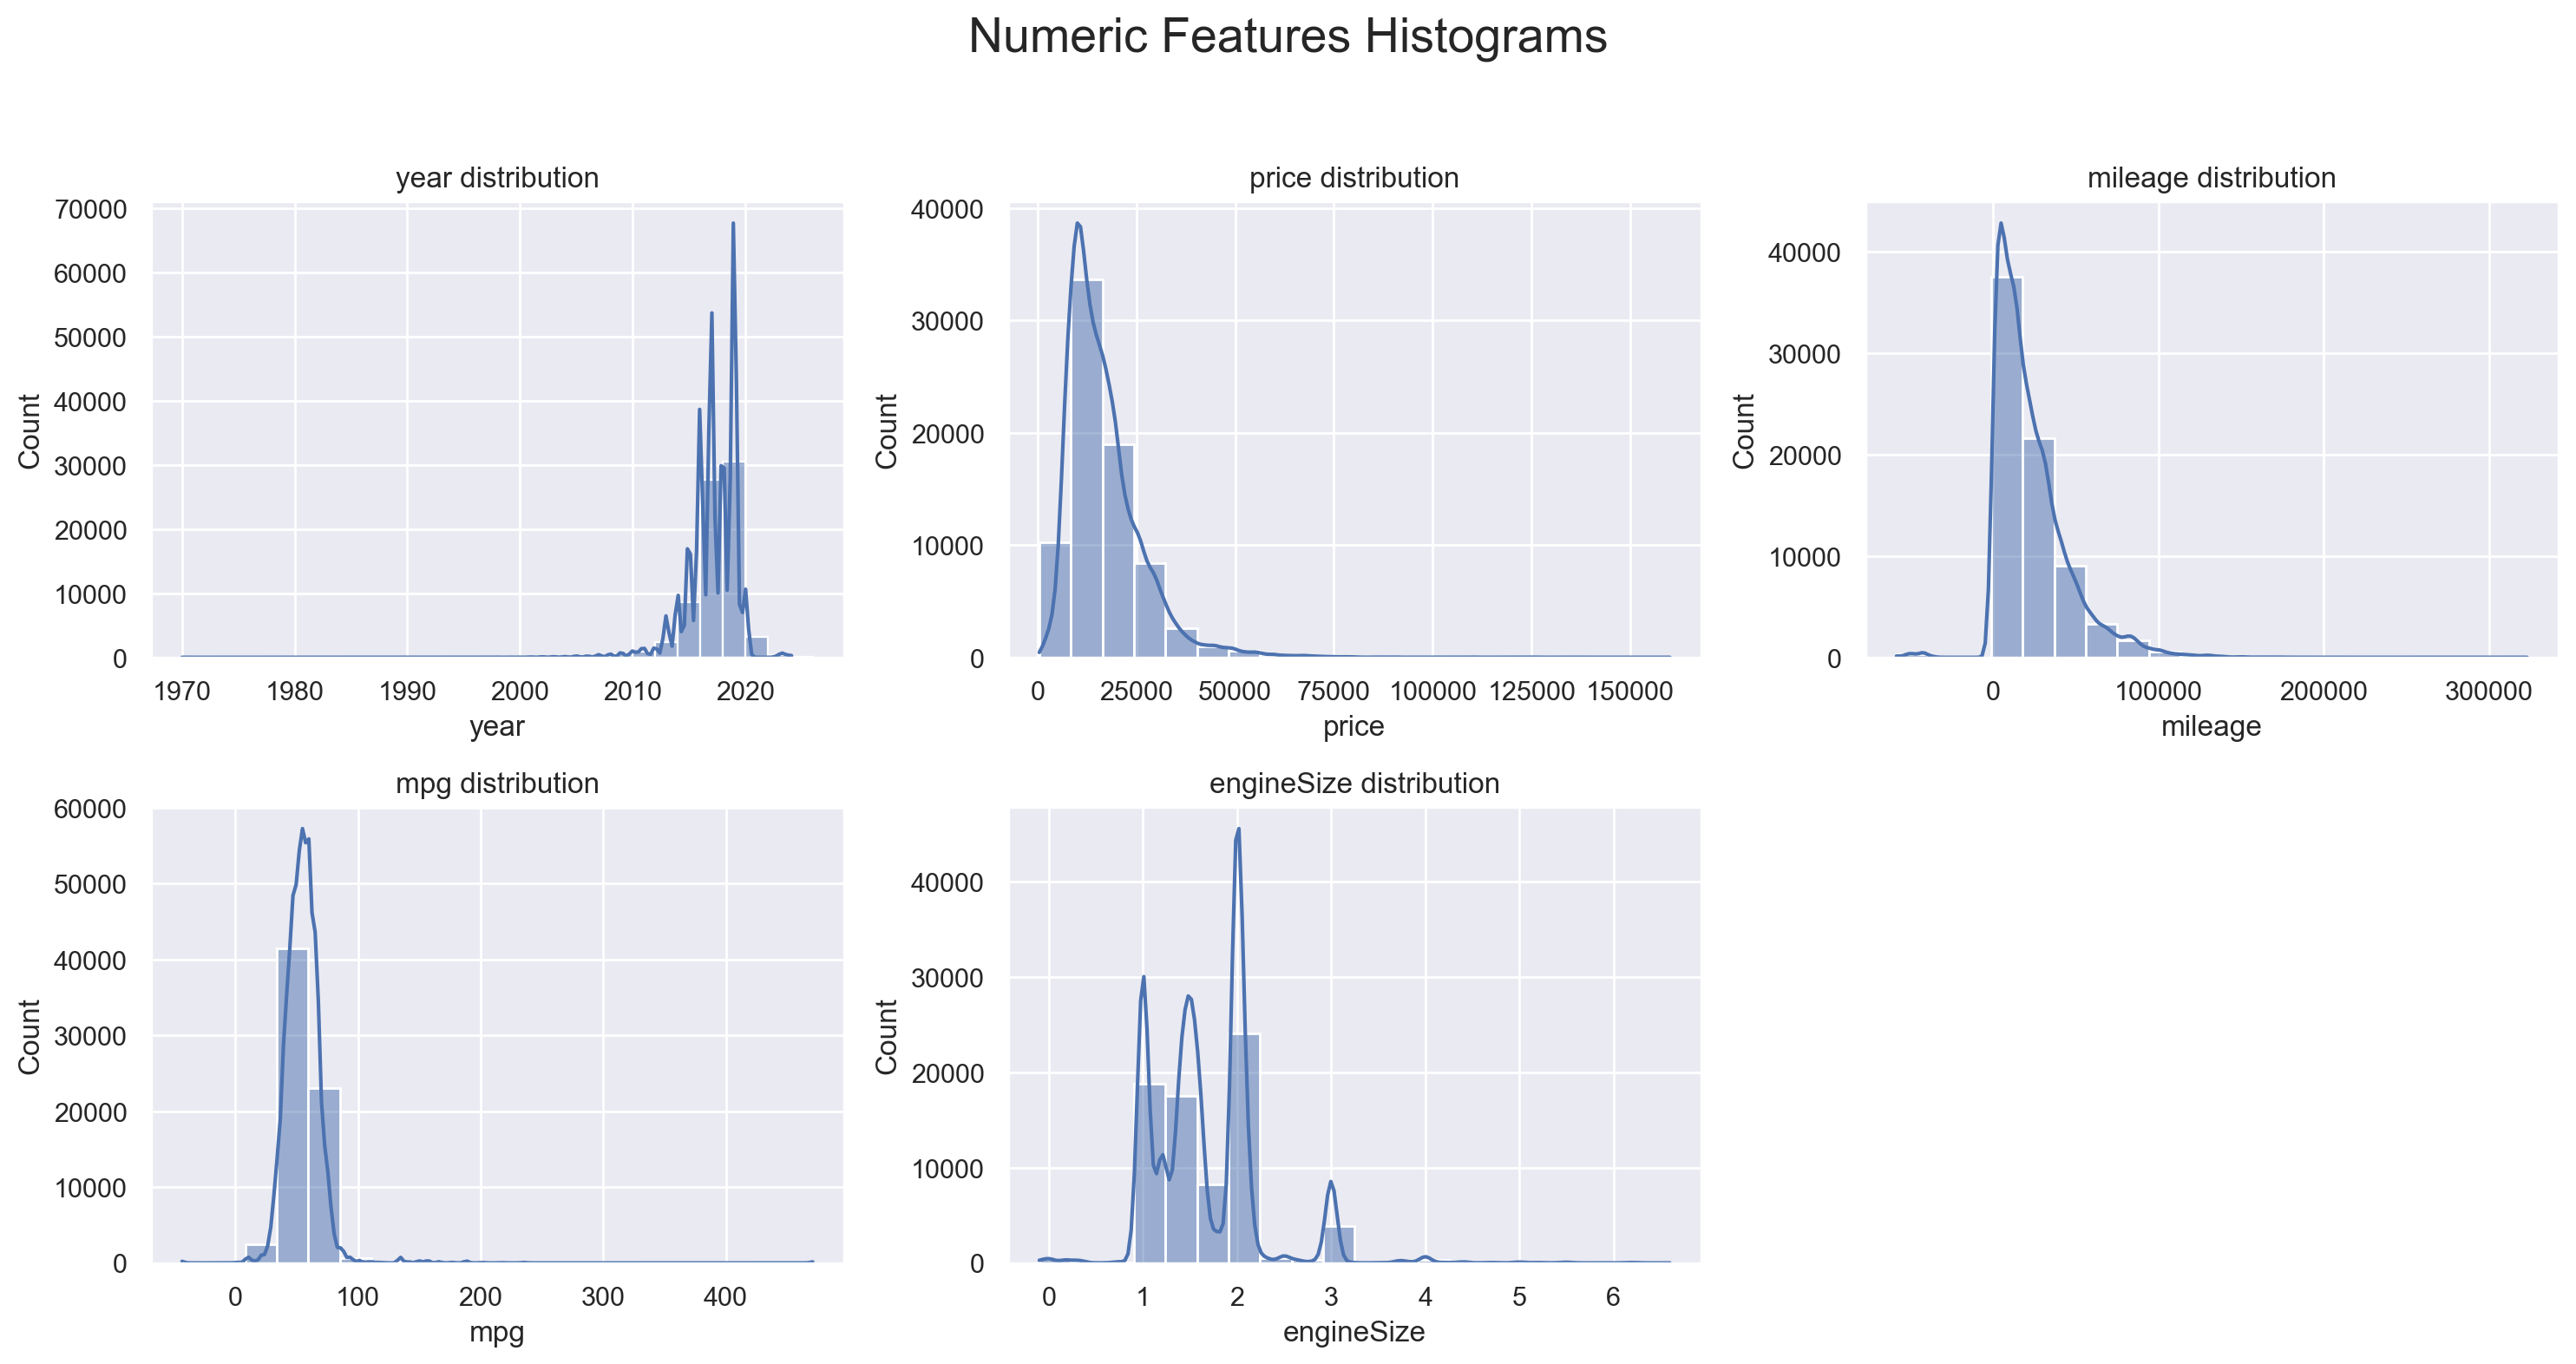

In [13]:
features_bins = {
    "year": np.arange(df["year"].min(), df["year"].max() + 2, 2),  # 2-year bins
    "price": 20,
    "mileage": 20,
    "mpg": 20,
    "engineSize": 20,
}

n_features = len(features_bins)
sp_cols = 3
sp_rows = 2  

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(15, 8))
axes = axes.flatten()

# Plot histograms
for ax, (feat, bins) in zip(axes, features_bins.items()):
    sns.histplot(data=df, x=feat, bins=bins, kde=True, ax=ax)
    ax.set_title(f"{feat} distribution")

for ax in axes[n_features:]:
    ax.set_visible(False)

plt.suptitle("Numeric Features Histograms", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

From these plots we can draw some conclusions.


| **Feature**           | **Distribution Summary**                                                                 | **Key Insights / Implications**                                                                                   |
|------------------------|------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------|
| **Year**               | Most vehicles registered between **2010–2022**, with a sharp peak around **2018–2021**. | Dataset mainly consists of **modern cars**; **older vehicles are underrepresented**, reducing generalization for them. |
| **Price**              | **Right-skewed** - majority priced below **£30,000**, with a long tail of high-value cars. | **Luxury/high-end cars** are rare; model may perform better on **mid-range vehicles**.                            |
| **Mileage**            | **Right-skewed** - most cars under **100,000 miles**, few above **200,000 miles**.       | Matches expectation: **newer cars dominate**, so **lower mileage** is common.                                     |
| **MPG (Fuel Efficiency)** | Distribution might reflect different **fuel types** (e.g., petrol, diesel, hybrid).         | **Fuel efficiency** may be an important factor in **segmenting vehicles** and **predicting price**.               |
| **Engine Size**        | Several peaks around **1.0L**, **1.5L**, and **2.0L**; few cars above **3.0L**.         | Prevalence of **small to mid-sized engines**; predictions for **large engines (>3.0L)** may be **less stable**.   |



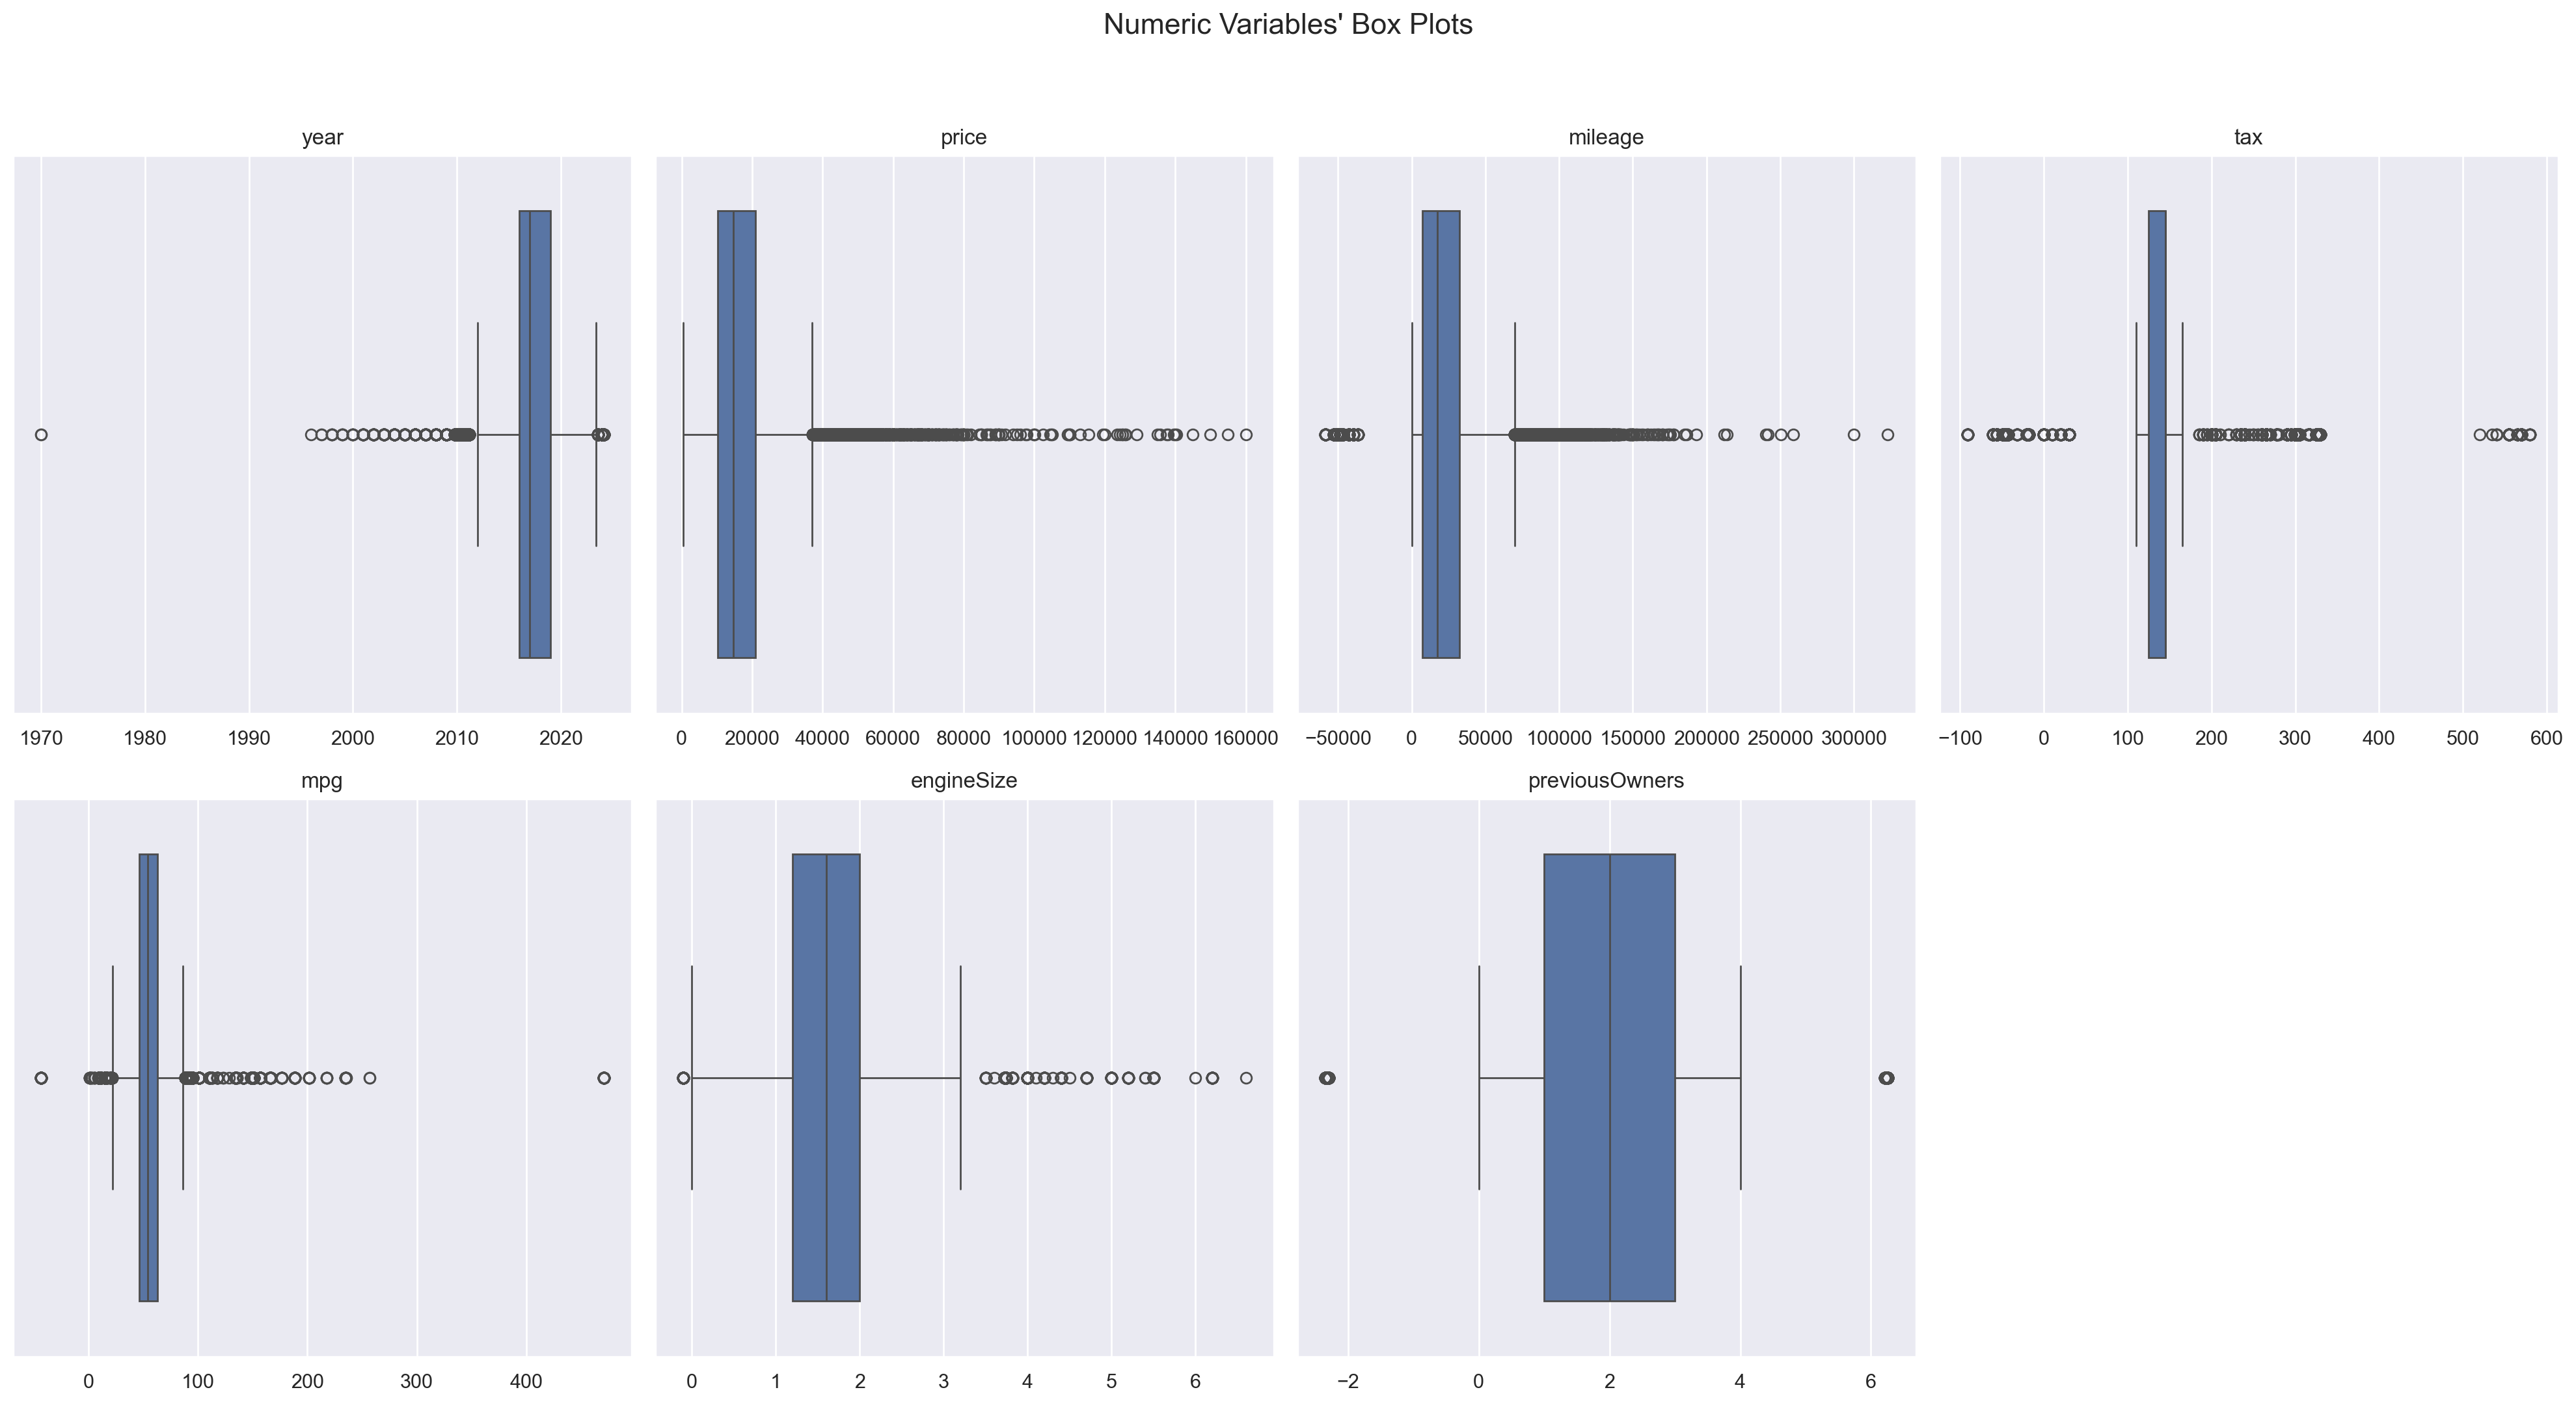

In [14]:
metric_features = df.select_dtypes(include=['number']).columns.tolist()
metric_features.remove('carID')
metric_features.remove("paintQuality%")
metric_features.remove( "hasDamage")

sp_rows = 2
sp_cols = math.ceil(len(metric_features) / sp_rows)

fig, axes = plt.subplots(
    sp_rows,
    sp_cols,
    figsize=(20, 11),
    tight_layout=True
)

axes = axes.flatten() if hasattr(axes, "flatten") else [axes]

for ax, feat in zip(axes, metric_features):
    sns.boxplot(x=df[feat], ax=ax)   
    ax.set_title(feat)
    ax.set_xlabel("") 

for i in range(len(metric_features), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Numeric Variables' Box Plots", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


Regarding the outliers we also obtained some key insights.

| **Feature**          | **Outlier Description**                                                                                      | **Interpretation**                                                                 |
|-----------------------|--------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------|
| **Year**              | Few cars registered **before 2005**.                                                                         | Represent **genuine old vehicles**, not measurement errors.                        |
| **Price**             | Several cars priced **>£100,000**.                                                                           | Reflect **luxury/sports models**; may **skew regression performance**.                  |
| **Mileage**           | Some values **>250,000 miles** and a few **negative** entries.                                               | High mileage = rare but valid; **negative values invalid**.                        |
| **Tax**               | Contains **negative** or **abnormally high** values.                                                         | Negative reflects **data entry errors** or inconsistencies.                                   |
| **MPG**               | Some values **>100 mpg**, unrealistic for most vehicles.**                                                     | Extremely low values need handling.                               |
| **Engine Size**       | Few values **>4.0L**, representing **high-performance or luxury cars**.                                      | Valid but rare; can **bias models**.                                   |                                          |
| **Previous Owners**   | Includes **negative values**.                                                                                | **Invalid data** - ownership count cannot be negative.                             |

**The average fuel efficiency for new cars is around [25-27 MPG](https://www.energy.gov/eere/vehicles/articles/fotw-1177-march-15-2021-preliminary-data-show-average-fuel-economy-new-light), but this might vary significantly by vehicle type, with smaller cars having more, and larger SUVs/trucks less mpg. However, electric vehicles are measured in MPGe, often exceeding 100 MPGe for efficient models. This is further comproved by the chapter 5.2.2. on the visualizations notebook.

---

#### 1.3.2 Categorical Data Visualizations

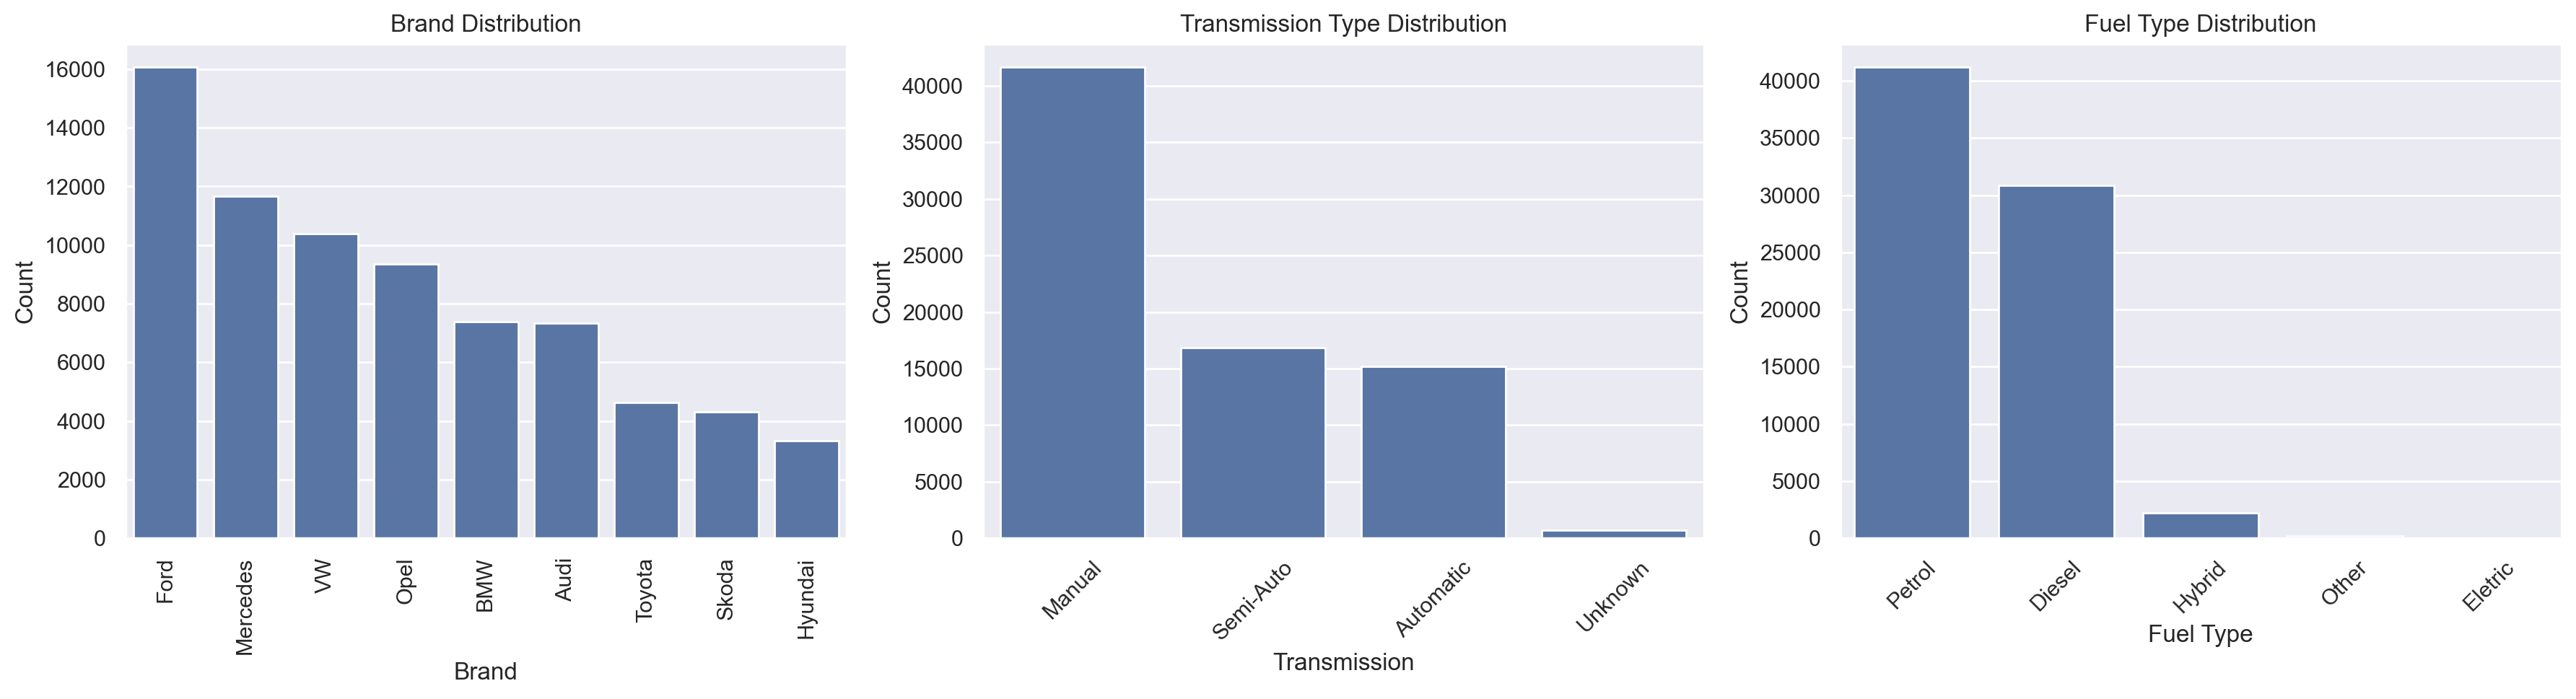

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 

sns.countplot(ax=axes[0], x=df["Brand"], order=df["Brand"].value_counts().index)
axes[0].set_title("Brand Distribution")
axes[0].set_xlabel("Brand")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(ax=axes[1], x=df["transmission"], order=df["transmission"].value_counts().index)
axes[1].set_title("Transmission Type Distribution")
axes[1].set_xlabel("Transmission")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[2], x=df["fuelType"], order=df["fuelType"].value_counts().index)
axes[2].set_title("Fuel Type Distribution")
axes[2].set_xlabel("Fuel Type")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

| **Variable**      | **Key Insights** |
|--------------------|------------------|
| **Brand** | - The most represented brand by far is **Ford**, followed by **Mercedes**, **Volkswagen**, and **Opel**. **BMW** and **Audi** appear in similar proportions.  <br> - At the lower end, **Hyundai**, **Skoda**, and **Toyota** are underrepresented, which may limit model generalization. |
| **Transmission** | - Over **half** of the dataset consists of **manual** vehicles.  <br> - **Semi-automatic** and **automatic** transmissions appear in similar proportions, while a few records with **unknown transmission** should be corrected or removed. |
| **Fuel Type** | - Dataset dominated by **Petrol** and **Diesel**, with **Petrol** clearly leading.  <br> - **Hybrid** vehicles are present but less common, and **Electric** cars are extremely rare.  <br> - **Other** also need to be corrected or removed.|
| **Model** | - Most brands have **2–3 dominant models** that make up the majority of their entries.  <br> - Some Brands, like **Mercedes**, one model (C-Class) dominates, while others, like **Audi** shows a more **balanced distribution** of models. <br>(!) **Due to the high cardinality**, the graphic is not presented here, but in the Visualizations notebook |


---

#### 1.3.3 Numerical Bivariate Analysis

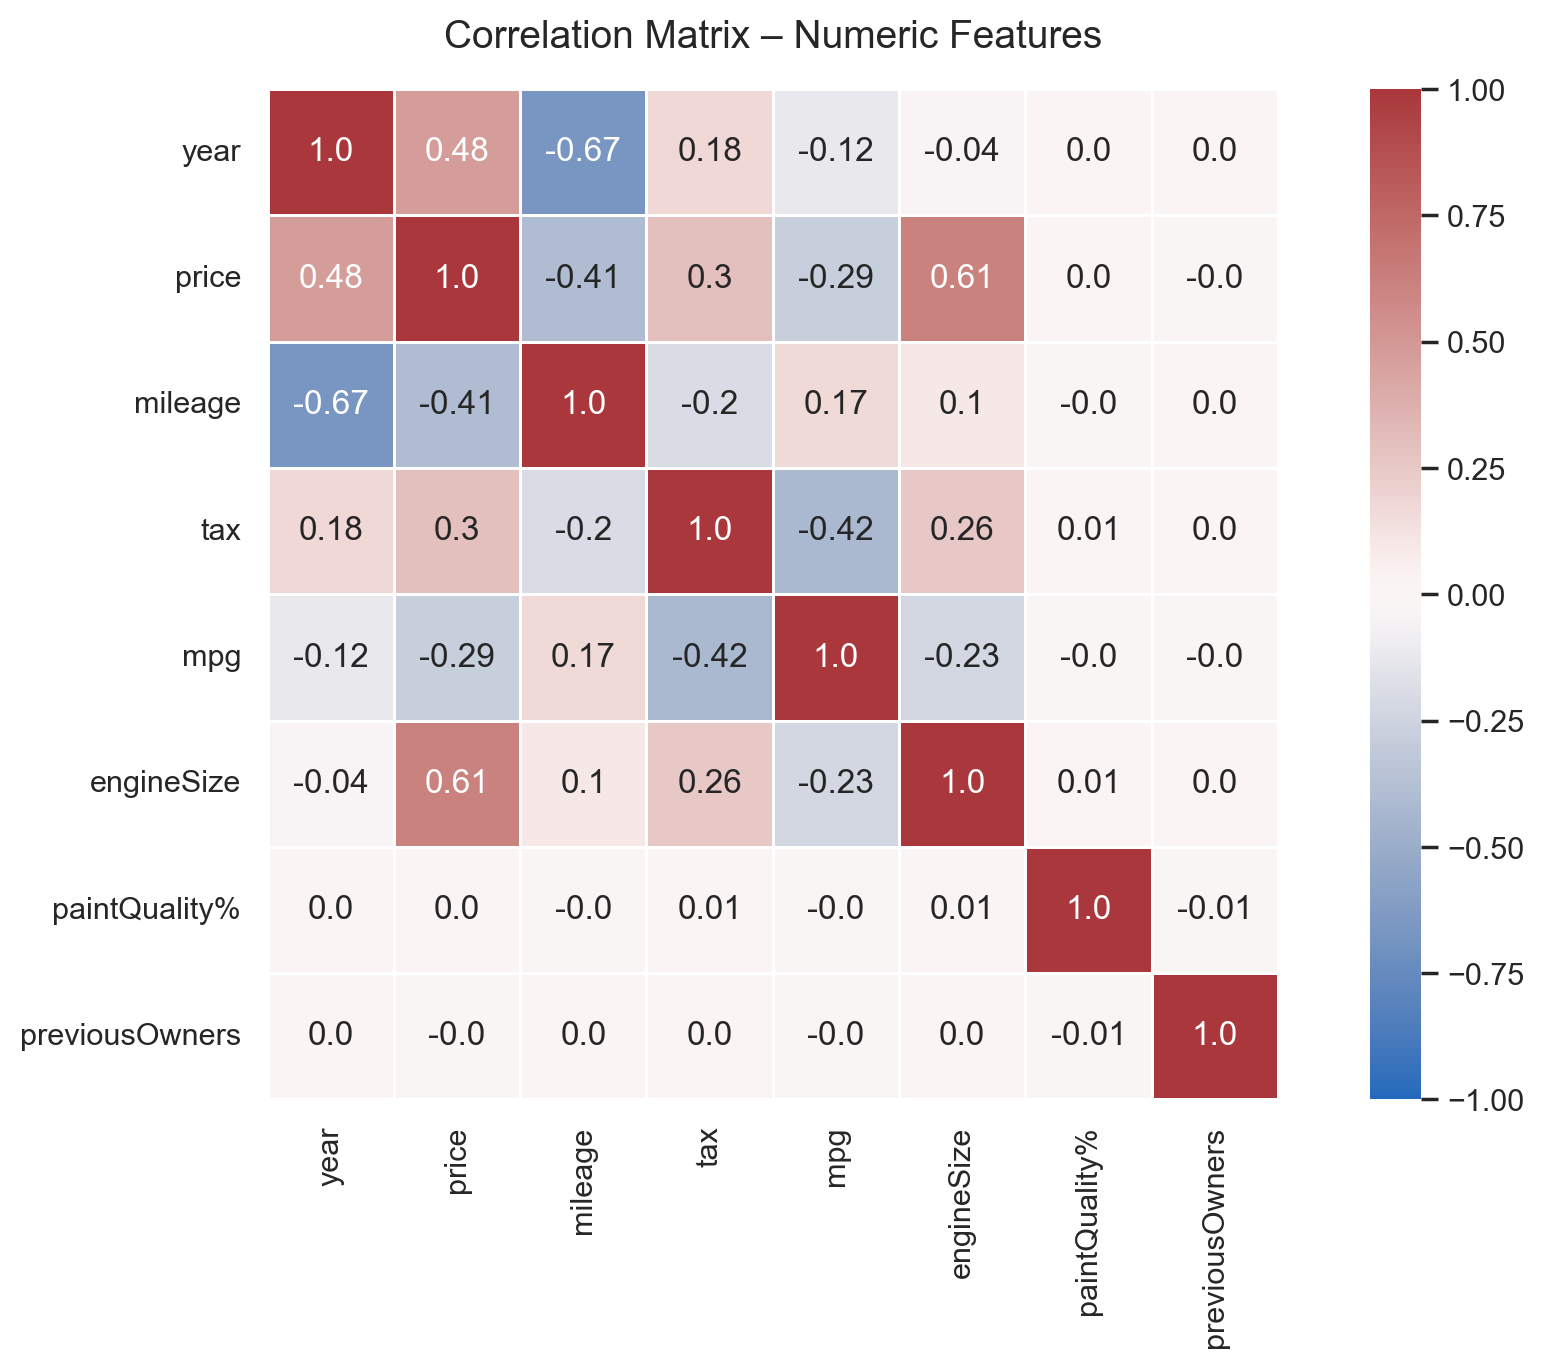

In [16]:
num_df = df.select_dtypes(include=[np.number])

num_df = num_df.drop(columns=["carID", "hasDamage"], errors="ignore")

corr = num_df.corr(method='pearson')

annot = corr.round(2).astype(str)

plt.figure(figsize=(10, 7))

sns.heatmap(data=corr,
            annot=annot,
            fmt='s',
            vmin=-1, vmax=1,
            center=0,
            square=True,
            linewidths=.5,
            cmap='vlag')

plt.title('Correlation Matrix – Numeric Features', fontsize=14, pad=15)
plt.tight_layout()

# Show plot
plt.show()


- The **price variable** remains **moderately correlated** with **engineSize (0.61)** and **year (0.48)**, as well as **mileage (-0.41)**, confirming that **newer cars with larger engines and less mileage** tend to be **more expensive**.

- **Mileage** maintains a **strong negative correlation** with **year (-0.67)**, reflecting the expected market pattern where **older cars have higher mileage**.
  
- **Tax** shows a **positive correlation** with **price (0.30)** and **engineSize (0.26)**, indicating that **more powerful and costly cars** generally fall into **higher tax brackets**. These, however, are **not very high values** for a correlation.
  
- **MPG** correlates **negatively** with **tax (-0.42)** and **engineSize (-0.23)**, as **larger engines consume more fuel** and tend to produce **higher emissions**. Like the above one, these values are **not very high**, however.

#### 1.3.4 Categorical Bivariate Analysis

| **Comparison** | **Key Findings** |
|----------------|------------------|
| **Brand × Transmission** | • **Manual Transmission** dominates most brands, especially **Ford**, **Opel**, and **Volkswagen**.  <br> • **Mercedes** is the opposite trend — mainly **Semi-Automatic** and **Automatic**, with very few **Manual** cars.  <br> • **Hyundai** is almost exclusively **Manual**, with few **Automatic/Semi-Automatic** vehicles.  <br> • **Audi** shows a **balanced mix** of transmission types. |
| **Brand × Fuel Type** | • **Hybrid** vehicles are concentrated in **Toyota**, with minor presence in **BMW**, **Hyundai**, and **Mercedes**.  <br> • **Audi** again displays the **most balanced fuel-type distribution**.  <br> • **Petrol** dominates in **Ford**, **Opel**, and **Volkswagen**.  <br> • **Diesel** is most prevalent in **Mercedes**, followed by **BMW**. |
| **Transmission × Fuel Type** | • **Manual** cars are mostly **Petrol**, but **Diesel Manual** cars are also significant.  <br> • **Semi-Automatic** cars show a **slightly Diesel-dominant** mix but are relatively balanced.  <br> • **Hybrid** vehicles are mainly **Automatic**, though less frequent than **Diesel** or **Petrol**. |


#### 1.3.5 Categorical Bivariate Analysis With the Target

| **Comparison** | **Key Findings** |
|----------------|------------------|
| **Fuel Type × Price** | • **Electric cars** show **very low standard deviation**, with prices **tightly clustered** around the median.  <br> • Their **median price** is **comparable** to other fuel types.  <br> • **Petrol cars** have a **slightly lower median price**, but display **many outliers**, indicating **higher price variability**. |
| **Transmission × Price** | • **Manual transmission vehicles** have a **notably lower median price** than other transmission types.  <br> • **Semi-automatic** and **automatic** vehicles exhibit **similar price distributions**. |
| **Brand × Price** | • There is a **clear price segmentation** across brands, reflecting **market positioning**.  <br> • **Audi**, **BMW**, and **Mercedes** show the **highest median prices**, forming the **premium/luxury segment**.  <br> • **Ford**, **Toyota**, and **Opel** cluster in the **lower price range**, appealing to **budget-conscious buyers**.  <br> • **Volkswagen**, **Hyundai**, and **Skoda** sit in the **mid-range segment**, balancing **affordability and features**. |


## 2. Clean, Pre-Process Dataset

This chapter will contain the description of all the steps that were required to clean the data, fix the empty values with correctness, and fix the column values. 

*Fixing the Categorical Feature values already took place in the beggining, to allow for correct data visualization.*

<div style="text-align:center; margin-top:10px;">
  <a href="notebooks/03_preprocessing.ipynb" 
     style="display:inline-block; background-color:#700000; color:#fff; 
            padding:8px 16px; text-decoration:none; border-radius:6px; 
            font-family:'Segoe UI', sans-serif; font-size:13px;">
      Go to Preprocessing Notebook ->
  </a>
</div>

An small summary of the most important processes used is below, regarding NaN analysis and the outlier handling. However, all the preprocessing, due to its large extent, is in its own notebook.

### 2.1. Fixing Empty Values

This subchapter will handle the visualization of the distribution and the methods used to fix the NaNs on the dataset.

#### 2.1.1. NaN Distribution Detection

In [17]:
def show_nan(ntype="both"):
    metric_features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']
    cat_features = ["Brand", "model", "transmission", "fuelType"]

    if ntype == "both":
        print(df.isna().sum())
    elif ntype == "cat":
        print(df[cat_features].isna().sum())
    elif ntype == "num":
        print(df[metric_features].isna().sum())
        
show_nan()

carID                0
Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64


In [18]:
missing_any = df.isnull().any(axis=1)
num_rows_with_missing = missing_any.sum()

print(f"Rows with at least one missing value: \n{num_rows_with_missing}\n")

missing_per_row = df.isnull().sum(axis=1)

missing_distribution = missing_per_row.value_counts().sort_index()

missing_distribution_df = (
    missing_distribution
    .rename_axis("Number of NaN's")    
    .reset_index(name="Number of lines")
)
missing_distribution_df.style.hide(axis='index')

Rows with at least one missing value: 
21524



Number of NaN's,Number of lines
0,54449
1,13422
2,6839
3,1162
4,98
5,3


In order to properly understand the distribution of missing values across different features, we will visualize the count of missing values for each feature using a module called **UpSet**.

This will help us identify which features have the most missing data and guide our imputation strategy. 

<Figure size 1000x600 with 0 Axes>

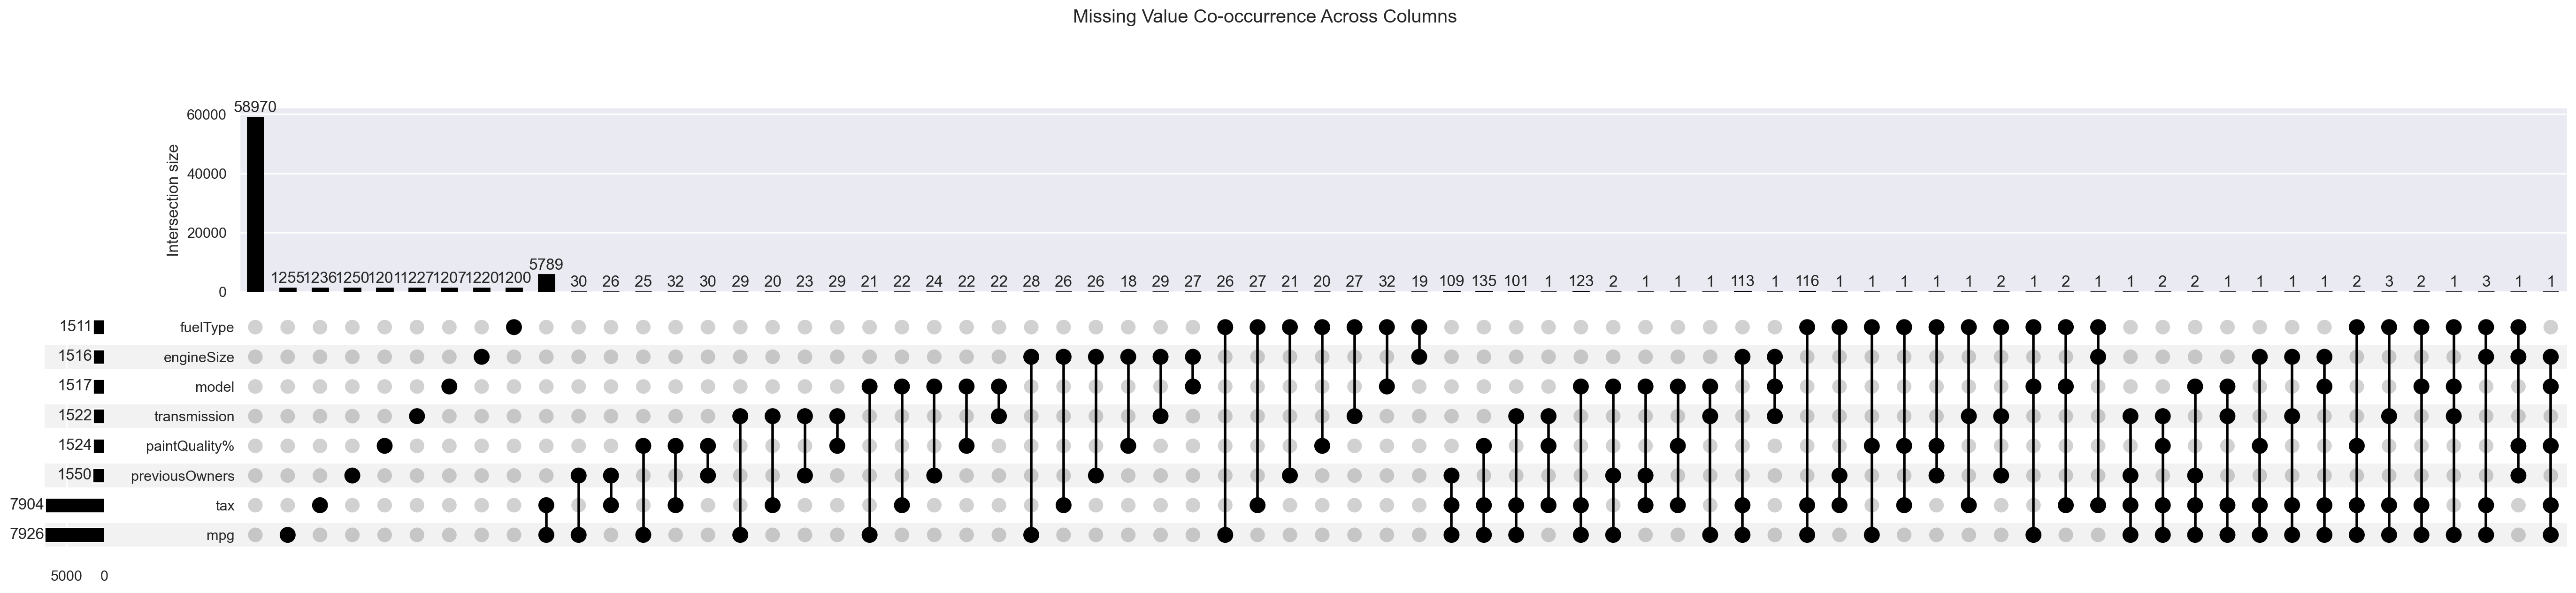

In [19]:
cols = ['model', 'transmission', 'fuelType', 'engineSize', 'paintQuality%', 
        'previousOwners', 'tax', 'mpg']

missing_data = df[cols].isnull()

upset_data = from_indicators(missing_data, data=None)

plt.figure(figsize=(10,6))
UpSet(upset_data, subset_size='count', show_counts=True).plot()
plt.suptitle('Missing Value Co-occurrence Across Columns', y=1.05)
plt.show()


From the UpSet plot, we can observe the following patterns regarding missing values in the dataset:
- The most common scenario is that rows have no missing values at all.
  
- From the ~7900 rows with missing values on *tax*, a significant portion (5789) has also missing values in *mpg*.
- Although the value of missing values in most features individually is around 1200-1300, they are NOT coincident per row. 
  - This means that, contrarily to what we believed, the combinations of missing values across multiple features are less frequent, indicating that **missingness is not uniformly distributed across all features**. 

### 2.2. Outlier Handling

> As previously identified in Section 1.3, several features exhibit outliers that could distort the statistical structure of the dataset and bias the model’s learning process. The following notebook detail the tailored strategies applied to each variable, explaining the rationale behind the chosen treatment methods and their expected impact on data integrity and predictive performance. 

#### 2.2.1. Overview Regarding the Manual Outlier Removal

| Variable | Action | Justification |
|-----------|---------|---------------|
| **year** | Removed values above 2020 and capped values below the plateau year | Years beyond 2020 fall outside the temporal scope of the dataset. For older vehicles, the smoothed median price curve becomes approximately flat below the plateau year, indicating that additional ageing no longer leads to systematic price differences. Capping prevents very old cars from exerting undue influence while preserving observations. |
| **mileage** | Removed negative values and capped values above the plateau mileage | Negative mileage is physically impossible. The median price curve shows that depreciation stabilises beyond the plateau mileage, meaning further increases do not correspond to consistent price changes. Capping limits the impact of extreme usage without discarding valid records. |
| **tax** | Replaced negative values with NaN and imputed using KNN (k=5) with `engineSize`, `mpg`, `year` | Negative tax values are invalid but are likely caused by data-entry or encoding errors. Because tax is strongly related to vehicle characteristics, KNN imputation using correlated features provides plausible estimates while avoiding unnecessary row removal. |
| **mpg** | Removed values above 400 and replaced negative values with NaN, then imputed using KNN (k=5) with `tax`, `engineSize` | Extremely high or negative mpg values are implausible. However, affected records often remain informative in other variables, so KNN imputation reconstructs consistent values based on similar vehicles rather than discarding the observations. |
| **engineSize** | Removed negative values | Engine displacement is a physical quantity and negative values cannot occur in reality; such records are therefore non-recoverable. |
| **paintQuality%** | Clipped values to the \[0, 100\] range | This variable represents a bounded percentage. Values outside the valid range indicate measurement or data-entry errors and are corrected by clipping to the nearest admissible limit. |
| **previousOwners** | Removed negative values | The number of previous owners is a count variable. Negative values have no valid interpretation and cannot be reliably inferred. |



#### 2.2.2. LOF Outlier Detection

We also used Local Outlier Factor (LOF), which is a density-based algorithm that detects outliers by comparing each point's local density with its neighbors' density.

Regarding the amount of rows removed:

In [20]:
outlier_removal_stats = pd.read_csv("results/preprocessing_results/folds/step1_outlier_statistics.csv")
outlier_removal_stats["percentage_removed"] = outlier_removal_stats["total_removed"] / outlier_removal_stats["initial_train_size"] * 100

outlier_removal_stats

,fold,initial_train_size,final_train_size,val_size,manual_removed,lof_removed,total_removed,percentage_removed
0,1,60749,59484,15188,966,299,1265,2.082339
1,2,60749,59499,15188,951,299,1250,2.057647
2,3,60750,59484,15187,967,299,1266,2.083951
3,4,60750,59503,15187,947,300,1247,2.052675
4,5,60750,59494,15187,957,299,1256,2.067490


#### 2.2.3. Other Steps

Other steps that took place were:

- NaN Filling;
- Fixing data types; 
- Creation new features;
- Scaling, Encoding.

All the data processing was done in 2 separate ways:
- To start, we did the preprocessing for the cross validation folds individually;
- Then, we applied the preprocessing for the whole dataset.

## 3. Feature Selection

In this chapter, we employed different techniques to access the importance of each feature and the impact on the model, filtering columns to reduce noise and model complexity.

<div style="text-align:center; margin-top:10px;">
  <a href="notebooks/04_feature_selection.ipynb" 
     style="display:inline-block; background-color:#700000; color:#fff; 
            padding:8px 16px; text-decoration:none; border-radius:6px; 
            font-family:'Segoe UI', sans-serif; font-size:13px;">
      Go to Feature Selection Notebook ->
  </a>
</div>

### **Numerical Variables**
| Predictor          | Spearman | $\eta^2$ | RFE (Linear Regression) | RFE (Support Vector Regressor) | RFE (Random Forest) | Lasso Regression | Conclusion |
|--------------------|----------|----------|-------------------------|--------------------------------|---------------------|------------------|------------|
| `year`             | DROP     | keep     | ALREADY DROPPED         | ALREADY DROPPED                | ALREADY DROPPED     | ALREADY DROPPED  | DROP       |
| `mileage`          | DROP?    | keep     | keep (5/5)              | keep (3/5)                     | keep (5/5)          | keep             | **keep**   |
| `tax`              | keep     | keep     | keep (3/5)              | keep (3/5)                     | keep (5/5)          | DROP             | **keep**   |
| `mpg`              | keep     | keep     | keep (5/5)              | keep (3/5)                     | keep (5/5)          | keep             | **keep**   |
| `engineSize`       | keep     | keep     | keep (5/5)              | keep (5/5)                     | keep (5/5)          | keep             | **keep**   |
| `previousOwners`   | DROP     | DROP     | keep (1/5)              | DROP (0/5)                     | keep (5/5)          | DROP             | **keep**   |
| `car_age`          | keep     | keep     | keep (5/5)              | keep (5/5)                     | keep (5/5)          | keep             | **keep**   |

### **Categorical Variables**
| Predictor                  | Cramér V | $\eta^2$ | RFE (Linear Regression) | RFE (Support Vector Regressor) | RFE (Random Forest) | Lasso Regression | Conclusion |
|----------------------------|----------|----------|-------------------------|--------------------------------|---------------------|------------------|------------|
| `Brand`                    | DROP     | keep     | ALREADY DROPPED         | ALREADY DROPPED                | ALREADY DROPPED     | ALREADY DROPPED  | DROP       |
| `model_encoded`            | keep     | keep     | keep (5/5)              | keep (5/5)                     | keep (5/5)          | keep             | **keep**   |
| `transmission_Automatic`   | keep*    | keep*    | keep (3/5)              | keep (1/5)                     | keep (5/5)          | DROP             | **keep**   |
| `transmission_Manual`      | keep*    | keep*    | keep (5/5)              | keep (3/5)                     | keep (5/5)          | keep             | **keep**   |
| `transmission_Semi-Auto`   | keep*    | keep*    | keep (4/5)              | keep (2/5)                     | keep (4/5)          | keep             | **keep**   |
| `fuelType_Diesel`          | keep*    | DROP?*   | keep (5/5)              | DROP (0/5)                     | keep (5/5)          | keep             | **keep**   |
| `fuelType_Eletric`         | keep*    | DROP?*   | keep (5/5)              | DROP (0/5)                     | DROP (0/5)          | DROP             | **keep**   |
| `fuelType_Hybrid`          | keep*    | DROP?*   | keep (1/5)              | keep (3/5)                     | keep (3/5)          | keep             | **keep**   |
| `fuelType_Petrol`          | keep*    | DROP?*   | keep (4/5)              | DROP (0/5)                     | keep (5/5)          | DROP             | **keep**   |

(*) For Cramér V and $\eta^2$, the evaluation was on the original categorical variable (`transmission` or `fuelType`), not on individual one-hot encoded columns.

## 4. Model Creation

In model creation, we created and tested models using our CV pipeline. 

<div style="text-align:center; margin-top:10px;">
  <a href="notebooks/05_model_creation.ipynb" 
     style="display:inline-block; background-color:#700000; color:#fff; 
            padding:8px 16px; text-decoration:none; border-radius:6px; 
            font-family:'Segoe UI', sans-serif; font-size:13px;">
      Go to Model Creation Notebook ->
  </a>
</div>

- First, we tested different models, default parameters, to measure baseline performance/accessing the most promissing regressors.
  
- After that, we tested different parameters on SVR, RF and KNN Regressor, which performed the best without tuning.

- Since Random Forest was, by far, the most promissing, we decided to implement GridSearch, using different parameters, as the max depth or the usage of bootstrapping. 

#### **Rationale for Choice of Evaluation Metrics and Interpretation of Results**

We used three evaluation metrics: R², MAE, and RMSE, each providing complementary insights into model performance.

- **R²** indicates how well the model explains the variance in the target variable. 
  
- **MAE (Mean Absolute Error)** was chosen as it is the standard metric on Kaggle for this task and represents the average prediction error in the same units as the target. 
  
- **RMSE (Root Mean Squared Error)** helps to assess how well the model handles extreme or high-value cases, since RMSE penalizes larger errors more heavily, it highlights difficulties in predicting extreme car prices, giving insight into the model’s robustness on those less represented / expensive models.


### 4.1. GridSearch Results

To analyse the impact of each metric, we decided to group the results by metric and compare them. By analysing the following plots, we can draw several conclusions about the impact of those different hyperparameters on model performance.

<h4>Bootstrap</h4>
<img src="results/figures/bootstrap.png" width="600"/>

<h4>Max Depth</h4>
<img src="results/figures/max_depth.png" width="600"/>

<h4>Minimum Samples per Leaf</h4>
<img src="results/figures/min_samples_leaf.png" width="600"/>

<h4>Minimum Samples per Split</h4>
<img src="results/figures/min_samples_split.png" width="600"/>

<h4>Number of Estimators</h4>
<img src="results/figures/num_estimators.png" width="600"/>


- **Maximum Depth**: By analysing the plot, we can confirm that varying it impacts the model significantly. The models obtained on average a better performance with max depth = 15. Less depth prokoved a worse performance, and increasing depth resulted on approximately the same performance.

- **Bootstrap**: Applying Bootstrap impacted the models performance as well, since on average, when bootstrap is applied, the models obtain a MAE of -200, and RMSE of -380.

- The rest of the hyperparameter variation impact on models performance can be considered neglible.

#### **The best model overall we achieved was:**

**500 estimators, a maximum depth of 30, minimum samples split of 5, minimum samples leaf of 1, and bootstrap=True, achieving an RMSE of 2318, MAE of 1323, and R-squared of 0.9487.**

This model configuration provides an excellent balance across all metrics:
- **Lowest error** (RMSE and MAE) among top performers
- **Highest R² score** (0.9487), explaining roughly 95% of the variance in the target variable

### 4.2. NN Training using Optuna for parameter Optimization

We implemented a custom neural network using a **Keras wrapper** to simplify training and inference. This wrapper provides a clean `.fit()` and `.predict()` interface, making the model easy to integrate into cross-validation and hyperparameter tuning workflows.

To optimize the model’s performance, we used **Optuna** for hyperparameter tuning. Instead of relying on grid search or random search, Optuna efficiently explores the hyperparameter space by learning from previous trials and focusing on promising configurations.

Model evaluation is performed using **our custom cross-validation pipeline**, where each fold is trained and evaluated independently. This independence allows to speed up this process, using **joblib** to parallelize fold training within each Optuna trial, in an attempt to reduce total optimization time.

<div style="text-align:center; margin-top:10px;">
  <a href="notebooks/06_nn_training.ipynb" 
     style="display:inline-block; background-color:#700000; color:#fff; 
            padding:8px 16px; text-decoration:none; border-radius:6px; 
            font-family:'Segoe UI', sans-serif; font-size:13px;">
      Go to Neural Networks Notebook ->
  </a>
</div>

#### 4.2.1. Results

Even after a lot of tuning, the submission csv had 2000 of MAE, which can show 2 things:

- Either NN tuning is too expensive for tasks as regression, and it is not worth to use them, being more pertinent the usage of other regressors.

- Or something is not correct in our pipeline, but due to time constraints, and due to the computacionally intensive task of training neural networks, we could not retry on time.